In [1]:
import warnings

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import t
from ISLP.models import summarize, ModelSpec as MS
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

np.random.seed(0)
warnings.filterwarnings('ignore')

%matplotlib inline

### Notebook contains a solutions from a book "Introduction To Statistical Learning" in Python edition written by Daniela Witten, Robert Tibshirani, Gareth James, Trevor Hastie and Jonathan Taylor.

# Table of Contents

* [Exercise 3.8 (a)](#Exercise-3.8-a)
* [Exercise 3.8 (b)](#Exercise-3.8-b)
* [Exercise 3.8 (c)](#Exercise-3.8-c)
* [Exercise 3.9 (a)](#Exercise-3.9-a)
* [Exercise 3.9 (b)](#Exercise-3.9-b)
* [Exercise 3.9 (c)](#Exercise-3.9-c)
* [Exercise 3.9 (d)](#Exercise-3.9-d)
* [Exercise 3.9 (e)](#Exercise-3.9-e)
* [Exercise 3.9 (f)](#Exercise-3.9-f)
* [Exercise 3.10 (a)](#Exercise-3.10-a)
* [Exercise 3.10 (b)](#Exercise-3.10-b)
* [Exercise 3.10 (c)](#Exercise-3.10-c)
* [Exercise 3.10 (d)](#Exercise-3.10-d)
* [Exercise 3.10 (e)](#Exercise-3.10-e)
* [Exercise 3.10 (f)](#Exercise-3.10-f)
* [Exercise 3.10 (g)](#Exercise-3.10-g)
* [Exercise 3.10 (h)](#Exercise-3.10-h)

In [2]:
df = pd.read_csv('../datasets/Auto.csv', na_values='?')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

# Exercise 3.8 a

Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output.

### i. Is there a relationship between the predictor and the response?

**Answer**:

Given `summarize` results and value of $\text{t-statistics}$ in absolute value of `horsepower` coefficient and corresponding $p$-value, there is a strong evidence to reject $H_0$ in favor of $H_a$, i.e. there is a relationship between predictor and dependent variable.

In [6]:
model = sm.OLS.from_formula('mpg ~ horsepower', data=df).fit()

summarize(model)

,coef,std err,t,P>|t|
Intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### ii. How strong is the relationship between the predictor and the response?

**Answer**:

We could calculate the $R^{2}$ metric proportion measure, which stands for an amount of explained variability in the response $Y$ using the predictor $X$.

Another way to measure the strength of a relationship would be $\text{RSE}$ (*Residual Standard Error*) which stands for an average deviation of response variable $Y$ from population regression line. In other words, if the $\text{RSE}$ is small, then $\hat{y} \approx y$ is small and that implies that the relationship is strong.

In 60\% predictor `horsepower` explains the variability in the response `mpg` which is a strong enough relationship. We also see that $\text{RSE} \approx 4.9$ which on average the our prediction of `mpg` will deviate from a population regression line by this value which is not big difference (21\%) error. 

In [7]:
RSS = np.sum(np.square(model.resid))
RSS

9385.915871932419

In [8]:
RSE = np.sqrt(RSS / (len(df) - 2))
RSE

4.90575691954594

In [9]:
TSS = np.sum(np.square(df.loc[:, 'mpg'] - df.loc[:, 'mpg'].mean()))
TSS

23818.99346938776

In [10]:
R_squared = 1 - (RSS / TSS)
R_squared

0.6059482578894348

In [11]:
RSE / df.loc[:, 'mpg'].mean() * 100

20.923714066914833

### iii. Is the relationship between the predictor and the response positive or negative?

**Answer**: We definitely see negative relationship between `mpg` and `horsepower`. 

`MPG` values decrease whereas `horsepower` values increase. We see also the non-linear relationship among those data points.

We can also conclude that relationship is negative due to the sign of $\beta_1$ which is negative.

In [12]:
model.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

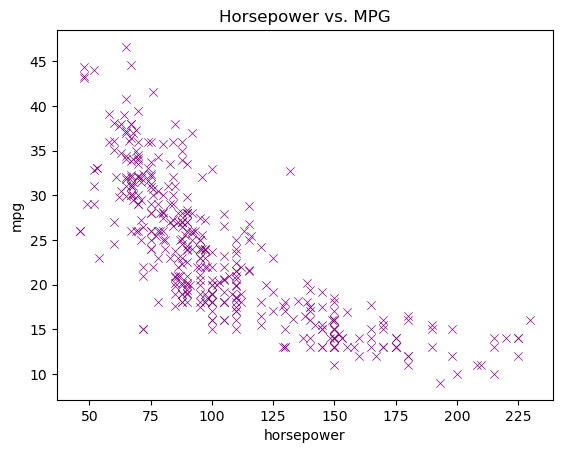

In [13]:
plt.title('Horsepower vs. MPG')
sns.scatterplot(data=df, x='horsepower', y='mpg', marker='x', color='purple')
plt.plot();

### iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95\% confidence and prediction intervals?

**Answer**:

$$
\hat{y} = \beta_0 + \beta_1x_0 
$$

$$
24.4670 = 39.9358 + (-0.1578 \cdot 98)
$$

Confidence interval of a mean response: with 95\% probability the value of mean response will fall between $\left[23.97, 24.96\right]$.

Prediction interval of a future single response variable with $X = 98$ will fall with 95\% probability between $\left[14.81, 34.12\right]$, which as expeceted is wider, because it also captures an irreducible error.

In [14]:
X_test = pd.DataFrame({'horsepower': [98]})
y_hat = model.get_prediction(X_test)

print(f'Prediction: {y_hat.predicted}')

Prediction: [24.46707715]


In [15]:
y_hat.conf_int(alpha=0.05) # 95% confidence interval

array([[23.97307896, 24.96107534]])

In [16]:
y_hat.conf_int(alpha=0.05, obs=True) # 95% prediction interval

array([[14.80939607, 34.12475823]])

### Exercise 3.8 b

Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

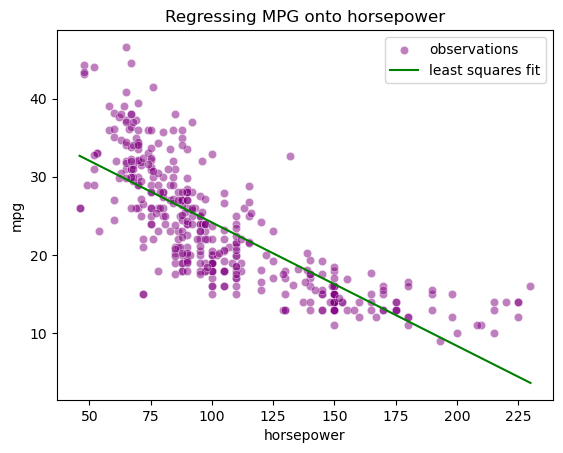

In [17]:
X_design = sm.add_constant(df['horsepower'])
y = df['mpg']
model1 = sm.OLS(y, X_design).fit()

df['predictions'] = model.predict(X_design)

plt.title('Regressing MPG onto horsepower')
sns.scatterplot(data=df, x='horsepower', y='mpg', marker='o', color='purple', label='observations', alpha=.5)

sns.lineplot(data=df, x='horsepower', y='predictions', color='green', label='least squares fit')

plt.legend()
plt.show();

### Exercsie 3.8 c

Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

**Answer**:

On the residual plot at left side panel, we can see non-linearity of the residuals. There is a strong pattern among the residuals which indicates such non-linearity — the linear fit is unsufficient to capture this relationship.

On the right-hand plot we see studentized residual plot, which we've discovered an `outliers`:
residuals of index `320` and `327` have an unusual values for $Y$.

We also can see that heteroscedasticity (non-constant variance in error terms) by funnel shape across the residuals. Which also Breusch—Pagan test confirmed. Potenital fix is to apply transformation of the resposne variable like: $\sqrt{Y}, \log{Y}$

On the leverage plot, we can see some unusual values for perdictors too, the leverage point equals to $0.005$ and some predictors $x_i$ are above that threshold.

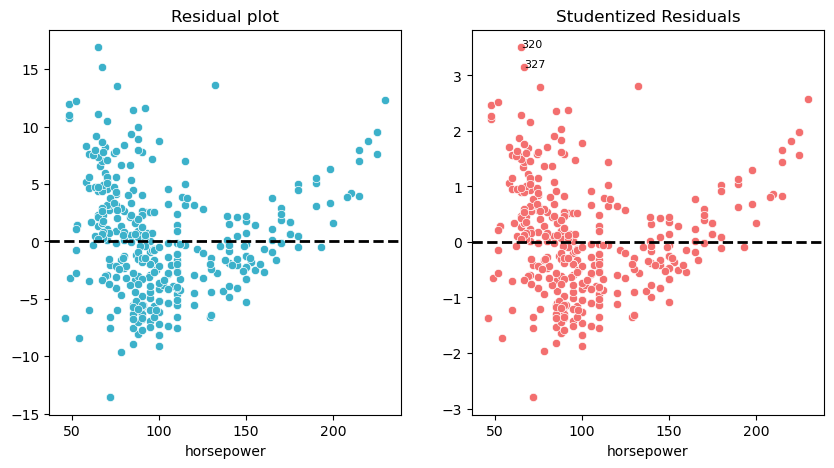

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(x=df.loc[:, 'horsepower'], y=model1.resid, marker='o', color='#3cb1ca', ax=ax[0])
ax[0].set_title('Residual plot')
ax[0].axhline(y=0, color='black', linestyle='--', lw=2,)

influence = OLSInfluence(model)
studentized_residuals = influence.resid_studentized_external
sns.scatterplot(x=df.loc[:, 'horsepower'], y=studentized_residuals, marker='o', color='#f36f6f', ax=ax[1])
ax[1].axhline(y=0, color='black', linestyle='--', lw=2, )
ax[1].set_title('Studentized Residuals')

for i in range(len(studentized_residuals)):
    if -3 >= studentized_residuals.iloc[i] or studentized_residuals.iloc[i] >= 3:
        ax[1].annotate(i, (df.iloc[i, 3], studentized_residuals.iloc[i]), fontsize=8)

plt.show();

In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan

test_stat, p_value, f_value, f_p_value = het_breuschpagan(model.resid, model.model.exog)
if p_value < 0.05:
    print('Signs of heteroscedasticity are present, p-value:', p_value)
else:
    print('No signs of heteroscedasticity, p-value:', p_value)


Signs of heteroscedasticity are present, p-value: 0.003090136011371003


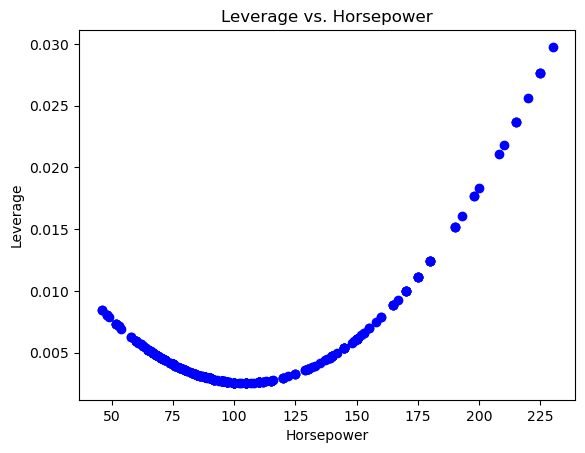

In [20]:
leverage = influence.hat_matrix_diag
df['leverage'] = leverage

plt.scatter(df['horsepower'], leverage, color='blue')
plt.xlabel('Horsepower')
plt.ylabel('Leverage')
plt.title('Leverage vs. Horsepower')
plt.show();

In [21]:
2 / len(df)

0.00510204081632653

### Exercise 3.9 a

Produce a scatterplot matrix which includes all of the variables in the data set.

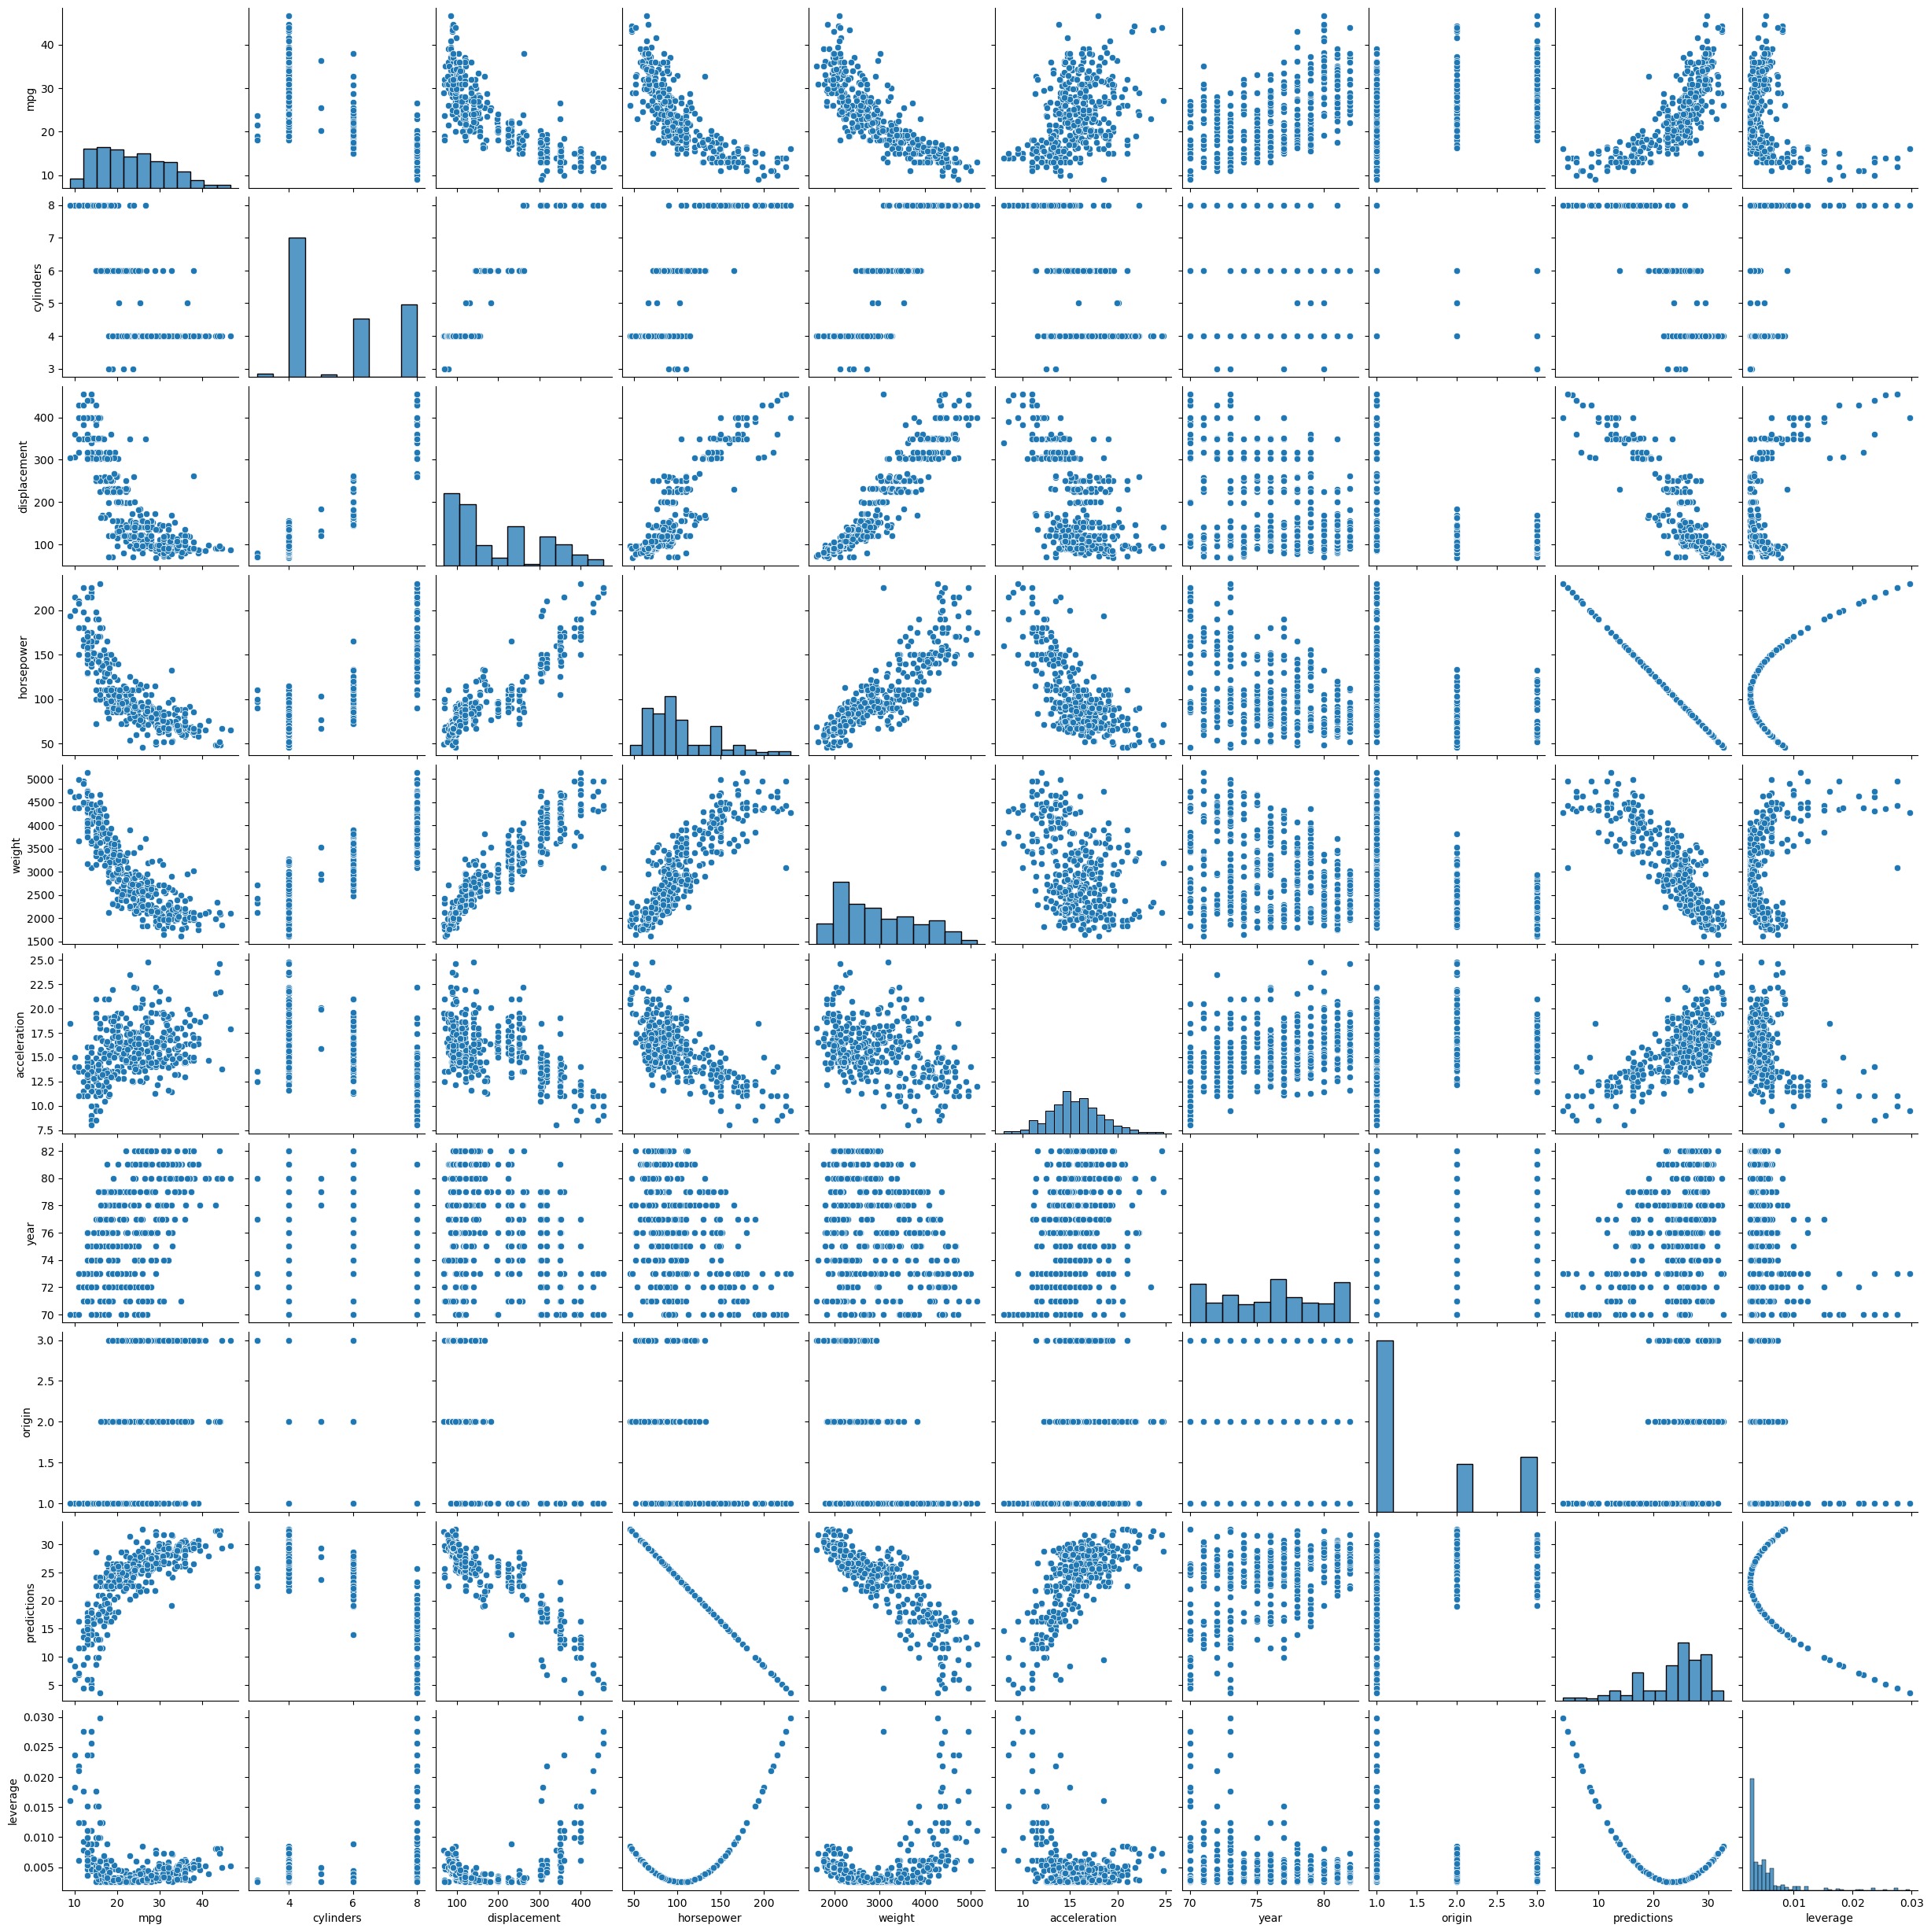

In [22]:
sns.pairplot(df);

### Exercise 3.9 b

Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [23]:
corr = df.corr(numeric_only=True)

corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,predictions,leverage
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.778427,-0.301754
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.842983,0.439082
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.897257,0.540771
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-1.000000,0.662534
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.864538,0.435057
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.689196,-0.382647
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.416361,-0.311650
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.455171,-0.160735
predictions,0.778427,-0.842983,-0.897257,-1.000000,-0.864538,0.689196,0.416361,0.455171,1.000000,-0.662534
leverage,-0.301754,0.439082,0.540771,0.662534,0.435057,-0.382647,-0.311650,-0.160735,-0.662534,1.000000


### Exercise 3.9 c

Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. 


Findings about a fit of our model:

* `cylinders` are no associated with a dependent variable `mpg`. The $p$-value is high and also $t$-value with a corresponding standard error indicates there is no relationship between those data,
* `horsepower` – large $p$-value indicates a strong evidence that there is no relationship between dependent variable $Y$ and predictor `horsepower`,
* `acceleration` — another predictor with large corresponding $p$-value – indicates a strong evidence to reject $H_a$ — there is no relationship between predictor and dependent variable.

In [24]:
model2 = sm.OLS.from_formula('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=df).fit()
summarize(model2)

,coef,std err,t,P>|t|
Intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


### i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.

**Answer**:

Let's perform ANOVA test, which will tell us that at least one predictors has a significance on a dependent variable $Y$:
- $H_0: \text{All the coefficients are equal to zero, meaning no predictor has an effect on the dependent variable}$,
- $H_1: \text{At least one coefficient is not equal to zero, meaning that at least one predictor has an effect on the dependent variable}$

Given an outcome of our `ANOVA` test:
* `cylinders` variable with corresponding $p$-value of $0.128$ indicates a strong evidence of $H_0$ — there is no significance between those predictor and dependent variable $Y$,
* `horsepower` another predictor variable which $p$-value is large, $0.219$ indicates strong evidence that this predictor does not have a significance on the response variable $Y$,
* `acceleration` with $p$-value $0.415$ suggests that there is no relationship between `acceleration` and `mpg`,
* other variables have a significance on the `mpg` predictors given their corresponding very small $p$-values.

So, yes there is a relationship between the subset of predictors and dependent variable.

In [25]:
anova_table = sm.stats.anova_lm(model2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
cylinders,25.791491,1.0,2.329125,1.277965e-01
displacement,77.612668,1.0,7.008884,8.444649e-03
horsepower,16.739754,1.0,1.511699,2.196328e-01
weight,1091.631693,1.0,98.580813,7.874953e-21
acceleration,7.358417,1.0,0.664509,4.154780e-01
year,2402.249906,1.0,216.937408,3.055983e-39
origin,291.134494,1.0,26.291171,4.665681e-07
Residual,4252.212530,384.0,NaN,NaN


### ii. Which predictors appear to have a statistically significant relationship to the response?

**Answer**:

Given the results of `sum_sq` from `anova_lm` table we can conclude that:

* `weight` is a statistically significant to the response variable $Y$,
* `year`, `origin` seems to be a statistically significant predictor to the response variable $Y$,
* rest of the predictors based on their $p$-values and also $\text{F-value}$ indicate that there are not significant to the response variable $Y$.

### iii. What does the coefficient for the year variable suggest?

**Answer**:

Coefficient of the `year` suggests that `mpg` will increase by  $0.75$ on average with a increase in one-unit in `year` given that other predictors remain fixed.

In [26]:
model2.params.year

0.7507726779503121

### Exercise 3.9 d

Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

**Answer**:

* Residuals plot suggests strong non-linearity among the resiudals indicating that a linear fit may be unsufficient to estimate a true relationship $f(X)$. We also see the *funnel-shape* which is an evidence of *heteroscedasticity* which suggests non-constant variance among the error terms.
* The `QQ Plot` (*Quantile-Quantile plot*) suggests non-linearity among the dataset, because we see systematic deviations from an identity line (one time is upward away and one is downward to an identity line). Deviations from the ends of a line suggests that the distribution of the data has a heavier tails than in a normal distribution (i.e. leptokurtic distribution). Possible solution would be a creation of a polynomial regression or applying non-linear transformations on predictors.
* Scale-Location plot is used to check the assumption of homoscedasticity (equal variances) in the residuals; if the residuals have a constant variance, then we would see no-pattern (the observations would be spreaded across the plot), but in this case there is a strong evidence of Heteroscedasticity, we can see a pattern across data points, possible solutions are applying some transformations on dependent variable $Y$ such as: $\sqrt{Y}, \log{Y}$.
* We also see some `outliers` – an unusual values of a response variable $Y$ given $X$. Possible solution would be just a removal of such observations.

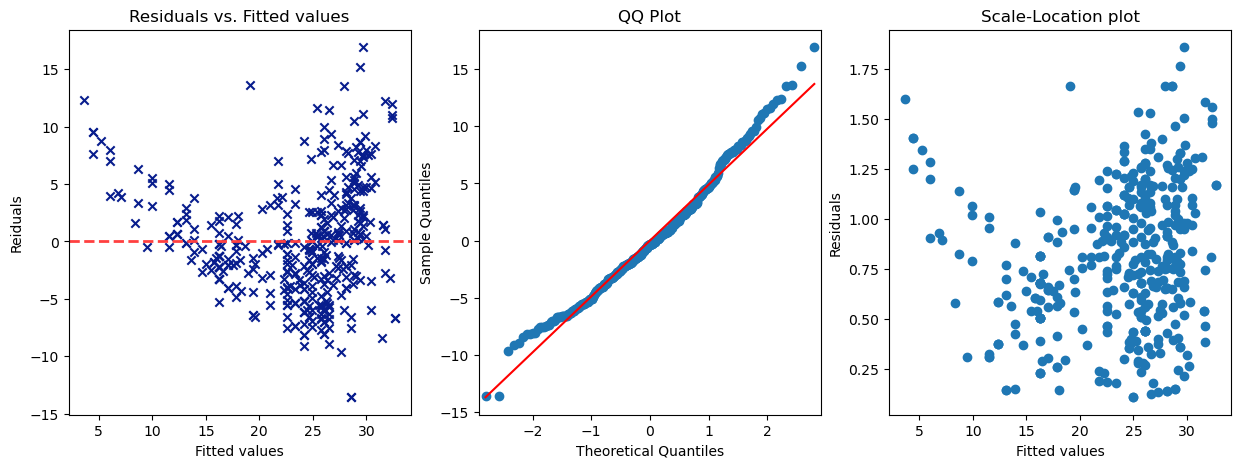

In [27]:
residuals = model.resid
fitted_values = model.fittedvalues
standardized_residuals = model.get_influence().resid_studentized_internal

fig, axes = plt.subplots(1,3, figsize=(15, 5))
axes[0].set_title('Residuals vs. Fitted values')
axes[0].scatter(fitted_values, residuals, marker='x', color='#081D8D')
axes[0].axhline(y=0, color='#FF4040', lw=2, linestyle='--')
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel('Reiduals')

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('QQ Plot')

axes[-1].set_title('Scale-Location plot')
axes[-1].scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)))
axes[-1].set_xlabel('Fitted values')
axes[-1].set_ylabel('Residuals')

plt.show();

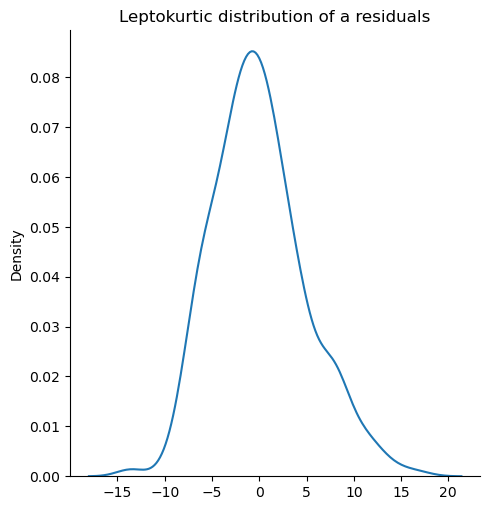

In [28]:
sns.displot(residuals, kind='kde', );
plt.title('Leptokurtic distribution of a residuals');

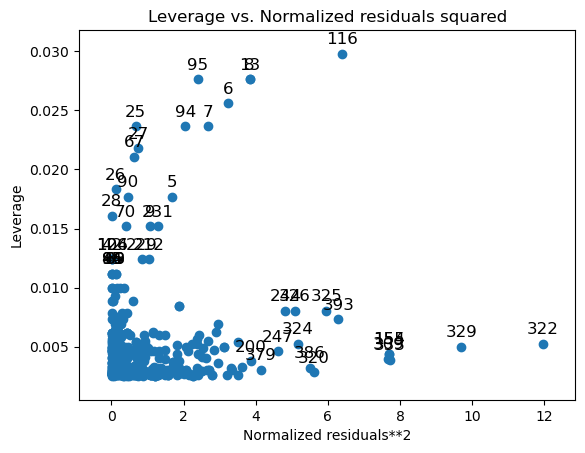

In [29]:
plot_leverage_resid2(model)
plt.show();

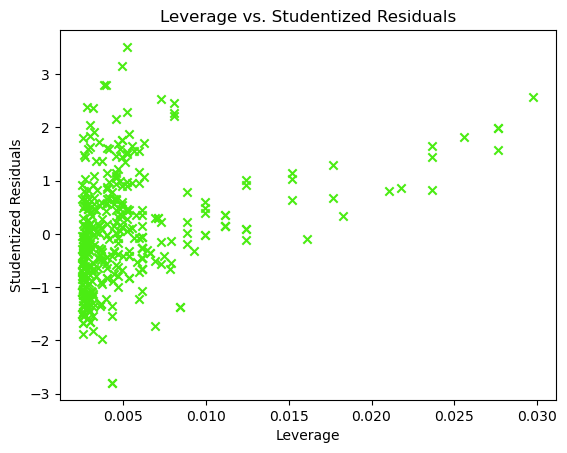

In [30]:
influence_summary = model.get_influence().summary_frame()
p = 7
n = len(df)

plt.scatter(influence_summary['hat_diag'], influence_summary['student_resid'], color='#4BEC13', marker='x')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Leverage vs. Studentized Residuals')
plt.show()

outliers = influence_summary[np.abs(influence_summary['student_resid']) > 2]
high_leverage_points = influence_summary[influence_summary['hat_diag'] > (2 * p / n)]

In [31]:
outliers

,dfb_Intercept,dfb_horsepower,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
116,-0.359459,0.431666,0.100451,2.559572,0.029753,0.448220,2.578033,0.451453
154,-0.161093,0.119564,0.016872,-2.772416,0.004371,-0.183695,-2.796554,-0.185294
155,-0.161093,0.119564,0.016872,-2.772416,0.004371,-0.183695,-2.796554,-0.185294
244,0.193135,-0.164571,0.019622,2.198277,0.008056,0.198102,2.209186,0.199085
247,0.129661,-0.097959,0.010666,2.147996,0.004602,0.146053,2.158044,0.146736
309,0.147088,-0.104705,0.015211,2.769644,0.003950,0.174418,2.793702,0.175933
320,0.078186,-0.039032,0.007907,2.365022,0.002819,0.125756,2.379110,0.126505
322,0.232568,-0.182431,0.031512,3.458909,0.005240,0.251047,3.508709,0.254661
324,0.151510,-0.118847,0.013614,2.273514,0.005240,0.165011,2.285795,0.165902
325,0.215032,-0.183229,0.024252,2.443878,0.008056,0.220235,2.459650,0.221656


### Exercise 3.9 e

Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

* `horsepower` with `acceleration` seem to be a significant interaction term,
* `weight` with `cylinders` seem to be a significant interaction term,
* adding an interactions seems that we increase multicollinearity between predictors,
* `horsepower` with `cylinders` seem to be a significant interaction term,
* `weight` and `acceleration` seem to be a significant interaction term.

In [32]:
int_model = sm.OLS.from_formula('mpg ~ horsepower * acceleration + year + origin + weight * cylinders', data=df).fit()

int_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     303.9
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.07e-160
Time:                        21:14:17   Log-Likelihood:                -970.31
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     383   BIC:                             1994.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.5742      5.330     -1.234      0.218     -17.053       3.905
horsepower                  0.0723      0.020      3.659      0.000       0.033       0.111
acceleration                0.7541      0.142      5.324      0.000       0.476       1.033
horsepower:acceleration    -0.0088      0.001     -5.990      0.000      -0.012      -0.006
year                        0.7830      0.045     17.547      0.000       0.695       0.871
origin                      0.6418      0.239      2.691      0.007       0.173       1.111
weight                     -0.0123      0.001    -10.879      0.000      -0.015      -0.010
cylinders                  -4.1630      0.543     -7.669      0.000      -5.230      -3.096
weight:cylinders            0.0013      0.000      8.095      0.000       0.001       0.002
==============================================================================
Omnibus:                       30.700   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.873
Skew:                           0.402   Prob(JB):                     6.72e-16
Kurtosis:                       4.906   Cond. No.                     7.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
int_anova = sm.stats.anova_lm(model1, model2, int_model)

int_anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,101.081623,6.878983e-76
2,383.0,3241.948306,1.0,1010.264225,119.351440,2.281389e-24


In [34]:
single_int_anova = sm.stats.anova_lm(int_model)
single_int_anova

,df,sum_sq,mean_sq,F,PR(>F)
horsepower,1.0,14433.077597,14433.077597,1705.106991,4.015308e-143
acceleration,1.0,580.951446,580.951446,68.632928,2.014764e-15
horsepower:acceleration,1.0,1203.633906,1203.633906,142.195909,4.283677e-28
year,1.0,2229.230213,2229.230213,263.358663,1.906648e-45
origin,1.0,766.062184,766.062184,90.501695,2.104895e-19
weight,1.0,806.658142,806.658142,95.297654,2.994290e-20
cylinders,1.0,2.724319,2.724319,0.321848,5.708316e-01
weight:cylinders,1.0,554.707356,554.707356,65.532481,7.680662e-15
Residual,383.0,3241.948306,8.464617,NaN,NaN


In [35]:
int_model2 = sm.OLS.from_formula('mpg ~ weight * acceleration + horsepower * cylinders + year', data=df).fit()

int_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     329.2
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          5.70e-158
Time:                        21:14:17   Log-Likelihood:                -979.76
No. Observations:                 392   AIC:                             1976.
Df Residuals:                     384   BIC:                             2007.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8465      8.266      0.707      0.480     -10.406      22.099
weight                  -0.0023      0.002     -1.397      0.163      -0.006       0.001
acceleration             0.2268      0.296      0.766      0.444      -0.355       0.809
weight:acceleration     -0.0001   9.83e-05     -1.374      0.170      -0.000    5.82e-05
horsepower              -0.2943      0.036     -8.239      0.000      -0.364      -0.224
cylinders               -4.1940      0.548     -7.651      0.000      -5.272      -3.116
horsepower:cylinders     0.0372      0.005      7.758      0.000       0.028       0.047
year                     0.7548      0.046     16.426      0.000       0.664       0.845
==============================================================================
Omnibus:                       43.114   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.545
Skew:                           0.656   Prob(JB):                     1.45e-17
Kurtosis:                       4.739   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exercise 3.9 f

Try a few different transformations of the variables, such as $\log{(X)}$, $\sqrt{X}$, $X^{2}$. Comment on your findings.

**Answer**:

* performing $\log{(X)}$ on a `weight` and using $\sqrt{X}$ on `year` eliminated a strong pattern of non-linearity in a residual plot as we see below. Data poinst now are more dispersed, indicating that fit is sufficient to capture this relationship,
* the model with three variables and non-linear transformations explains in 84\% the variability in the response $Y$ by using $X$,
* We could also eliminate an outliers as well as high-leverage points,
* *Residuals plot* suggests that there is a sign of heteroscedasticity among the error terms (residuals). Funnel shape of residuals is a sign of non-constant variance. Performed tests with very small $p$-values indicates a strong evidence of present non-constant variance.


In [36]:
X_weight = np.log(df.loc[:, 'weight'].to_numpy())
X_year = np.sqrt(df.loc[:, 'year'].to_numpy())
X_origin = np.square(df.loc[:, 'origin'].to_numpy())
X = np.concatenate((X_weight.reshape(-1, 1), X_year.reshape(-1, 1), X_origin.reshape(-1, 1)), axis=1)

X_design = sm.add_constant(X)


model = sm.OLS(y, X_design).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     676.6
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.01e-153
Time:                        21:14:17   Log-Likelihood:                -1002.6
No. Observations:                 392   AIC:                             2013.
Df Residuals:                     388   BIC:                             2029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8070      9.866      6.062      0.000      40.409      79.205
x1           -19.4127      0.715    -27.165      0.000     -20.818     -18.008
x2            13.4973      0.784     17.217      0.000      11.956      15.039
x3             0.1698      0.062      2.730      0.007       0.048       0.292
==============================================================================
Omnibus:                       56.502   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.751
Skew:                           0.731   Prob(JB):                     9.04e-30
Kurtosis:                       5.460   Cond. No.                         767.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

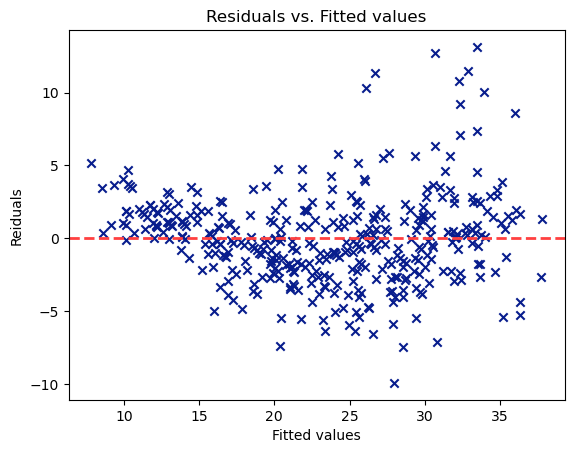

In [37]:
residuals = model.resid
fitted_values = model.fittedvalues
standardized_residuals = model.get_influence().resid_studentized_internal

plt.title('Residuals vs. Fitted values')
plt.scatter(fitted_values, residuals, marker='x', color='#081D8D')
plt.axhline(y=0, color='#FF4040', lw=2, linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel('Reiduals')
plt.show();

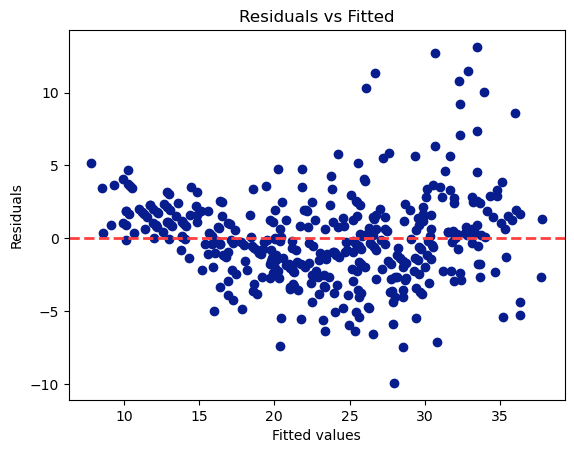

In [38]:
plt.scatter(fitted_values, residuals, marker='o', color='#081D8D')
plt.axhline(y=0, color='#FF4040', lw=2, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show();

In [39]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residuals, model.model.exog)
lzip(name, test)


[('Lagrange multiplier statistic', 23.21100218222159),
 ('p-value', 3.649308279308606e-05),
 ('f-value', 8.140037528227131),
 ('f p-value', 2.8677889341372826e-05)]

In [40]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, model.model.exog)
lzip(name, test)

[('F statistic', 2.825510191369185), ('p-value', 9.986459601633768e-13)]

### Exercise 3.10 a

Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [41]:
car_df = pd.read_csv('../datasets/Carseats.csv')

car_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [43]:
car_df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

First, we need a create a *dummy variable*, pandas has built-in method `get_dummies` for *one-hot* encoding. We will create $k - 1$ dummy variable as authors in book to omit an association with bias unit predictor from `statsmodels` library.

In [44]:
data = pd.get_dummies(car_df, columns=['Urban', 'US'], drop_first=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,True,True
1,11.22,111,48,16,260,83,Good,65,10,True,True
2,10.06,113,35,10,269,80,Medium,59,12,True,True
3,7.40,117,100,4,466,97,Medium,55,14,True,True
4,4.15,141,64,3,340,128,Bad,38,13,True,False


In [45]:
X = data.loc[:, data.columns[data.columns.isin(['Price', 'Urban_Yes', 'US_Yes'])]]
y = data.loc[:, 'Sales']
X_design = sm.add_constant(X)

model = sm.OLS(y, X_design.astype(float)).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           2.39e-23
Time:                        21:14:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 3.10 b

Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

**Answer**:

From a `summary()` method we can see that:

* $\beta_0 = 13.0435$ — meaning without any predictor (without any increase in predictor), on average model predicts $13$ units in `Sales` of child seats,
* $\beta_1 = -0.0545$ — meaning that we would get a decrease on average by $0.05454$ units in `Sales` given that other predictors are fixed,
* $\beta_2 = -0.0219$ – meaning that we would decrease of `Salse` on average by $0.0219$ given that other predictors are fixed and `Urban_Yes` are set to `True` compared to `False`, but as we see a corresponding $p$–value we might suggest that this predictor has no significance on depenent variable $Y$ hence this interpreation might be incorrect,
* $\beta_3 = 1.2006$ = meaning that we would increase of `Salse` on average by $1.2006$ given that other predictors are fixed and `US_Yes` are set to `True`.

### Exercise 3.10 c

Write out the model in equation form, being careful to handle the qualitative variables properly.

Let's define our one-hot encoded predictor `US` and `Urban`:

$$
x_{i | \text{US} } = \begin{cases} 
1 & \text{ whether the store is in the US }\\
0 & \text{ whether the store is not in the US }
\end{cases}
$$

$$
x_{i | \text{Urban} } = \begin{cases} 
1 & \text{ whether the store is in an urban location }\\
0 & \text{ whether the store is in an rural location }
\end{cases}
$$


We have a multiple linear regression model, such that:

$$
\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_{i1} + \begin{cases}
\beta_2x_{i2} & \text{ if the ith store is in the US }\\
0 & \text{ if the ith store is not in the US } 
\end{cases} + \begin{cases}
\beta_3x_{i3} & \text{ if the ith store is in an urban location }\\
0 & \text{ if the ith store is in an rural location } 
\end{cases}
$$

Where:

* $\beta_0 = 13.0435$,
* $\beta_1 = -0.0545$,
* $\beta_2 = -0.0219$,
* $\beta_3 = 1.2006$.

### Exercise 3.10 d

For which of the predictors can you reject the null hypothesis: $H_0 : \beta_j = 0$?

**Answer**:

* $\text{t-value} = -0.081$ with a big $\text{std err} = 0.272$ indicates a strong evidence that $X_{\text{urban}}$ has no significance on `Sales`. Also $\text{p-value} = 0.936$ suggests to reject $H_a$ in favor of $H_0$.

### Exercise 3.10 e 

On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [47]:
X = data.loc[:, data.columns[data.columns.isin(['Price', 'US_Yes'])]]
y = data.loc[:, 'Sales']
X_design = sm.add_constant(X)

model2 = sm.OLS(y, X_design.astype(float)).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           2.66e-24
Time:                        21:14:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 3.10 f

How well do the models in [(a)](#Exercise-3.10-a) and [(e)](#Exercise-3.10-e) fit the data?

**Anwer**:

Comparing `summary()` method for two models we see, that:

* both models have a corresponding $R^{2} = 0.239$ which is a not sufficient explanation of variability in the response $Y$ based on $X$ (23.9\%),
* based on both models `RSE` we see that no bigger improvement after fitting a model with only significant predictors (improvement in an error in average deviation from a population regression line is 0.04\%),
* dispersion of residuals in both examples in residuals plot indicates linearity relationship between $X$ and $Y$,
* we see that estimation of $\beta = 1.1996$ coefficient of `US` is above the 95\% confidence interval: $\left[0.692, 1.708\right]$ which leads to poor predictions,
* based on the given adjusted $R^{2}$ and lower $\text{SE}$ in `model 2` — this model is relatively better than `model 1`. This `model 2` is "parsimonius" (parsimonious model is one that explains the data with the fewest number of predictors or parameters without losing its ability to fit the data well).

In [49]:
RSS_model1 = np.sum(np.square(model.resid))
RSS_model2 = np.sum(np.square(model2.resid))

RSE_model1 = np.sqrt(RSS_model1 / (len(df) - 3 - 1)) # formula is: sqrt(RSS / (n - p 1)) where n – # samples, p — # predictors
RSE_model2 = np.sqrt(RSS_model2 / (len(df) - 2 - 1))

print(f'RSE of model 1: {RSE_model1:.4f}, RSE of model 2: {RSE_model2:.4f}')

print(f'An error (%) of an average deviation in response variable y from population regression line: \n\t model 1: {(RSE_model1 / y.mean()) * 100:.2f}%,\n\t model 2: {(RSE_model2 / y.mean()) * 100:.2f}%.')

RSE of model 1: 2.4979, RSE of model 2: 2.4947
An error (%) of an average deviation in response variable y from population regression line: 
	 model 1: 33.32%,
	 model 2: 33.28%.


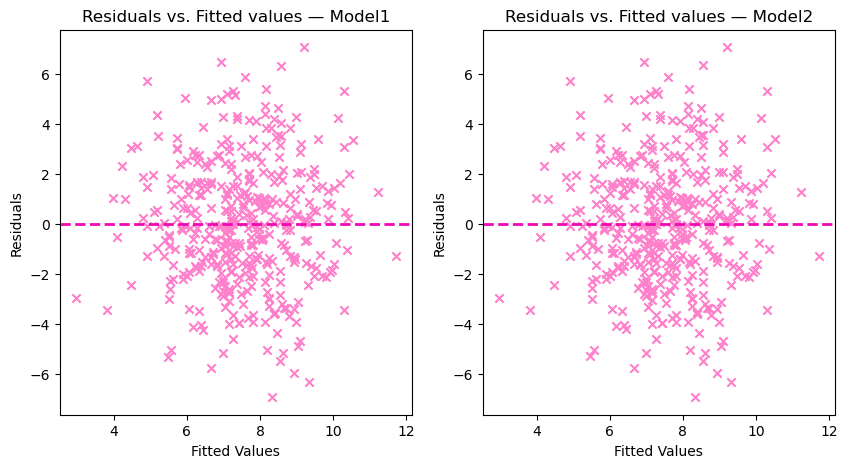

In [50]:
model1_residuals = model.resid
model1_fitted_values = model.fittedvalues

model2_residuals = model2.resid
model2_fitted_values = model2.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(model1_fitted_values, model1_residuals, marker='x', color='#FE7FCA')
axes[0].axhline(y=0, linestyle='--', color='#F008B2', lw=2)
axes[0].set_title('Residuals vs. Fitted values — Model1')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')

axes[-1].scatter(model2_fitted_values, model2_residuals, marker='x', color='#FE7FCA')
axes[-1].axhline(y=0, linestyle='--', color='#F008B2', lw=2)
axes[-1].set_title('Residuals vs. Fitted values — Model2')
axes[-1].set_xlabel('Fitted Values')
axes[-1].set_ylabel('Residuals')

plt.show();

### Exercise 3.10 h

Is there evidence of outliers or high leverage observations in the model from [(e)](#Exercise-3.10-e)?

**Answer**:

* based on the *studentized residuals* plot we have a lot points that are *outliers*,
* based on the *leverage plots* we can also see some unusual values of predictors.

95% t–distribution interval: [-1.96595743  1.96595743]



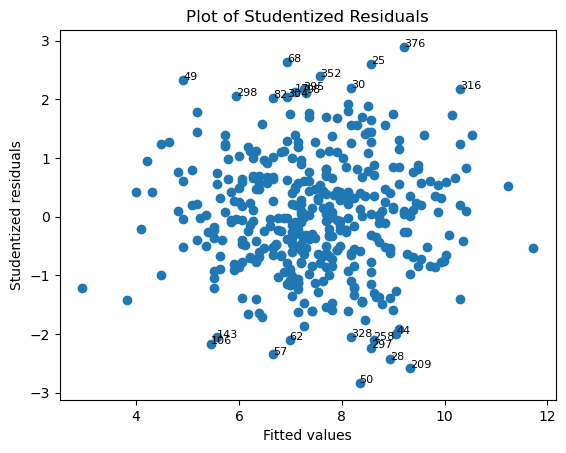

In [51]:
n, p = X.shape
alpha = 0.05
t_bounds = t.ppf([alpha / 2, 1 - alpha / 2], df=n-p-1)
print(f'95% t–distribution interval: {t_bounds}\n')

influence = model2.get_influence()
studentized_residuals = influence.resid_studentized_external

plt.scatter(model2_fitted_values, studentized_residuals)

for index, value in enumerate(studentized_residuals):
    if t_bounds[0] >= value or value >= t_bounds[-1]:
        plt.annotate(index, (model2_fitted_values[index], value), fontsize=8) 

plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.title('Plot of Studentized Residuals')
plt.show();

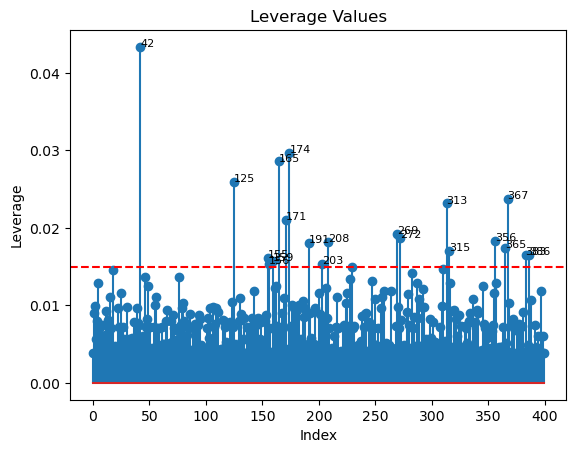

In [55]:
leverage = influence.hat_matrix_diag
n, p = X.shape
threshold = 2 * (p + 1 ) / n
high_leverage_points = np.where(leverage > threshold)[0]


plt.stem(leverage)
plt.axhline(y=threshold, color='r', linestyle='--')

for index in range(leverage.shape[0]):
    if leverage[index] >= threshold:
        plt.annotate(index, (index, leverage[index]), size=8)
        
plt.title('Leverage Values')
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.show();

In [53]:
high_leverage_points

array([ 42, 125, 155, 156, 159, 165, 171, 174, 191, 203, 208, 269, 272,
       313, 315, 356, 365, 367, 383, 386])

### Exercise 3.11 a